<img src = "https://drive.google.com/uc?export=view&id=1XIxF92v5BOrpS63i6FMIXGddxAp8WSHd" alt = "Encabezado MLDS" width = "100%">  </img>

# **Modelado estadístico con *Python***
---
En este notebook presentaremos los conceptos fundamentales y las herramientas para realizar **análisis de correlaciones** y **análisis de regresiones** con *Python*.

Para realizar este tipo de análisis estadísticos avanzados usando *Python* usaremos principalmente dos librerías especializadas: **`scipy`** y **`statsmodels`**.

<img src="https://github.com/scipy/scipy.org/blob/master/www/_static/logo.png?raw=true" alt="scipy" style="30%">
<img src="https://www.statsmodels.org/stable/_images/statsmodels-logo-v2-horizontal.svg" alt="statsmodels" width="45%">

In [3]:
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
# Otras librerías de utilidad.

import numpy as np
import pandas as pd

# Matplotlib se verá en los recursos de la Unidad 4.
import matplotlib  
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Para verificar las versiones de las librerías

!python --version
print('SciPy', scipy.__version__)
print('statsmodels', sm.__version__)
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Matplotlib', matplotlib.__version__)

Python 3.8.3
SciPy 1.6.2
statsmodels 0.11.1
Pandas 1.0.5
NumPy 1.19.5
Matplotlib 3.2.2


**Versiones utilizadas:**


*   **`Python`**: 3.6.9
*   **`SciPy`**: 1.4.1
*   **`statsmodels`**: 0.10.2 
*   **`Pandas`**: 1.1.5
*   **`NumPy`**: 1.19.5
*   **`Matplotlib`**: 3.2.2




# **1. Análisis de correlación**
---
El análisis de correlación es el proceso estadístico en el que se busca identificar asociaciones (relaciones o dependencias) entre dos variables. Estas relaciones se cuantifican con coeficientes de correlación, que representan numéricamente el grado de relación entre las variables analizadas.

## **1.1 Coeficientes de correlación**
---

Los **coeficientes de correlación** pueden tener valores de entre $-1.0$ y $1.0$. Una correlación positiva significa que las variables tienen una relación directa, mientras que una correlación negativa indica que las variables tienen una relación inversa entre sí. Mientras más cerca está de los extremos $-1.0$ y $1.0$, mayor es la fuerza de la correlación. Los valores cercanos a $0.0$ manifiestan una correlación lineal nula entre las variables.

Existen 3 tipos de coeficientes de correlación:
* **Coeficiente de correlación $r$ de Pearson**: Es el coeficiente de correlación **más utilizado**, y de especial utilidad con **variables cuantitativas**. Es un método paramétrico, y por lo tanto, depende del supuesto de que los datos tienen una **distribución normal y varianzas homogéneas**. Es especialmente sensible a valores atípicos, por lo que se recomienda limpiar adecuadamente los datos.
* **Coeficiente de correlación $\rho$ de Spearman**: Es un método no-paramétrico, de utilidad con **variables categóricas ordinales** o **variables numéricas**. Su cálculo es muy similar al coeficiente de Pearson, agregando consideraciones adicionales en el uso de variables de rango. Los datos pueden ser no normalmente distribuidos y no haber homogeneidad de varianzas.
* **Coeficiente de correlación $\tau$ de Kendall**: Es un método no-paramétrico usado en **variables categóricas ordinales**. Se basa en la correspondencia entre el orden de cada pareja de observaciones. Debido a esto es más costoso a nivel computacional, pero más robusto en algunos casos. No realiza ninguna suposición sobre la distribución de los datos. La única suposición es que existe una relación monotónica entre las variables probadas.



### **1.1.1. Usando `Pandas`**
---

En *Python* es posible hacer análisis de correlación usando *NumPy*, *pandas* y *SciPy*, principalmente. Usando ***pandas*** se pueden llevar acabo análisis básicos por medio de las siguientes funciones, vistas en la unidad anterior:

* [**`pd.Series.corr`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html): Calcula el coeficiente de correlación con otra **`Series`** de *pandas*, excluyendo los valores faltantes. Recibe como parámetro el método usado (**`'pearson', 'kendall', 'spearman'`**).

* [**`pd.DataFrame.corrwith`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html): Calcula la correlación uno a uno entre las filas o columnas de un **`DataFrame`** de *pandas* con las filas o columnas de otra **`Series`** u otro **`DataFrame`**. Recibe como parámetro el método usado (**`'pearson', 'kendall', 'spearman'`**).

* [**`pd.DataFrame.corr`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html): Calcula la matriz de correlación entre las columnas de un **`DataFrame`** de *pandas*, excluyendo los valores nulos o faltantes. Recibe como parámetro el método usado (**`'pearson', 'kendall', 'spearman'`**).

Más adelante en este Notebook veremos otros análisis más avanzados usando *SciPy*. Por el momento, veamos algunos ejemplos usando *pandas*.


Inicialmente vamos a trabajar con los siguientes datos de ejemplo:

In [4]:
np.random.seed(1) # Para que siempre genere los mismos números aleatorios

var1 = pd.Series(range(10))
var2 = pd.Series(range(10,0,-1))
var3 = pd.Series(np.random.randint(0,10,10))
var4 = pd.Series(np.random.randint(0,10,10))

df = pd.DataFrame(data={'var1':var1, 'var2':var2, 
                        'var3':var3, 'var4':var4, })
df

,var1,var2,var3,var4
0,0,10,5,2
1,1,9,8,4
2,2,8,9,5
3,3,7,5,2
4,4,6,0,4
5,5,5,0,2
6,6,4,1,4
7,7,3,7,7
8,8,2,6,7
9,9,1,9,9


**Correlación positiva perfecta**: Cuando una variable se incrementa la otra también, en la misma medida.

In [5]:
# Correlación de var1 con ella misma = 1.0

r = var1.corr(var1) # Método Pearson por defecto
r

0.9999999999999999

Se recomienda siempre visualizar los datos para poder interpretar los resultados de las correlaciones:

In [6]:
def graficar_correlación(df, var_a, var_b):

  r = df[var_a].corr(df[var_b]);
  fig, ax = plt.subplots(dpi = 110);
  df.plot.scatter(var_a, var_b, title=f"Coeficiente de correlación: {r :.2}", ax = ax,
                marker='o', linestyle='None', s = 70, alpha = 0.5, grid=True # Parámetros de estilo (Más información en la Unidad 4 y 5)
                ); 


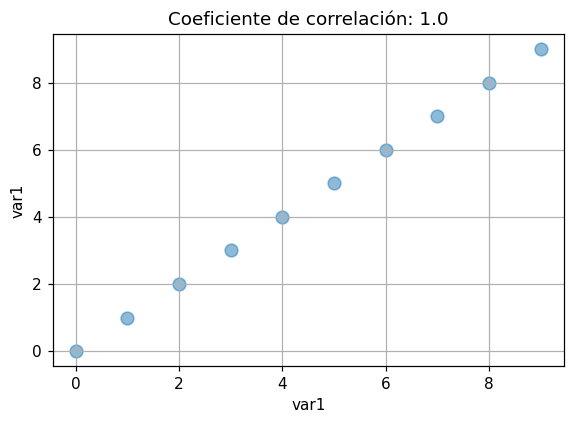

In [7]:
graficar_correlación(df, 'var1', 'var1');

**Correlación negativa perfecta**: Cuando una variable se incrementa la otra disminuye, en la misma medida.

In [8]:
# Correlación de var1 con respecto a var2 = -1.0 (aprox)
r = var1.corr(var2) # Método Pearson por defecto

r

-0.9999999999999999

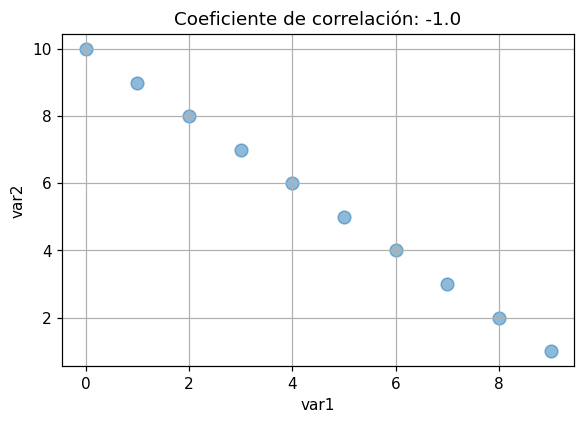

In [9]:
graficar_correlación(df, 'var1', 'var2');

**Correlación nula**: Las variables no presentan una correlación lineal entre sí.

In [10]:
# Correlación de var1 con respecto a var3 = 0.0 (aprox)
r = var1.corr(var3) # Método Pearson por defecto
r

0.0

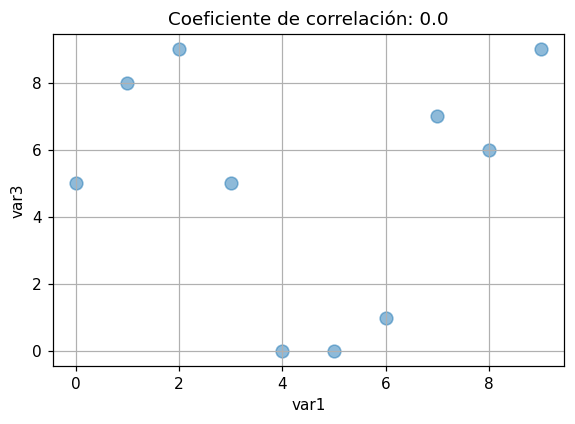

In [11]:
 graficar_correlación(df, 'var1', 'var3');

**Correlación positiva alta**: Cuando una variable se incrementa la otra también, no necesariamente la misma medida.

In [12]:
# Correlación de var1 con respecto a var4 = 0.75 (aprox)
r = var1.corr(var4) # Método Pearson por defecto
r

0.7452525354944346

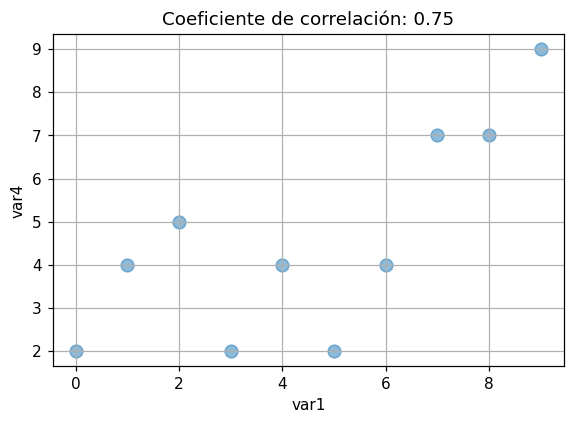

In [13]:
graficar_correlación(df, 'var1', 'var4');

**Análisis de correlación entre múltiples variables**

---

Muchas veces es necesario analizar las correlaciones existentes entre múltiples variables al mismo tiempo. Para esto podemos hacer lo siguiente:

In [14]:
# Correlación de cada columna de "df" con respecto a la Serie "var1"

df.corrwith(var1) # Método Pearson por defecto

var1    1.000000
var2   -1.000000
var3    0.000000
var4    0.745253
dtype: float64

In [15]:
# Correlación de cada columna de "df" con respecto a la Serie "var4"
df.corrwith(var4) # Método Pearson por defecto

var1    0.745253
var2   -0.745253
var3    0.561298
var4    1.000000
dtype: float64

También, es posible calcular la matriz de correlación de un **`DataFrame`**. De esta forma podemos explorar todas las posibles correlaciones entre las variables numéricas que componen el conjunto de datos. Esto es muy útil para hacer análisis de asociaciones en *datasets* reales: 

In [16]:
df.corr()

,var1,var2,var3,var4
var1,1.000000,-1.000000,0.000000,0.745253
var2,-1.000000,1.000000,0.000000,-0.745253
var3,0.000000,0.000000,1.000000,0.561298
var4,0.745253,-0.745253,0.561298,1.000000


En cada celda nos informa cuál es el coeficiente de correlación de la combinación de variables dada por las fila y columna seleccionada. Además, note que el resultado es otro *DataFrame* que podemos manipular, por ejemplo:

In [17]:
matriz_corr = df.corr()
matriz_corr['var4']

var1    0.745253
var2   -0.745253
var3    0.561298
var4    1.000000
Name: var4, dtype: float64

In [18]:
matriz_corr.loc['var2','var4']

-0.7452525354944347

### **1.1.2. Usando `NumPy`**
---
En caso que nuestros datos estén en forma de arreglos de *NumPy*, podemos hacer el mismo análisis anterior usando la función **`np.corrcoef`**:

* [**`np.corrcoef`**](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html): Retorna la matriz de correlación entre las variables (coeficiente de correlación de *Pearson*).


In [19]:
np.random.seed(1) # Para que siempre genere los mismos números aleatorios y/o reiniciar la semilla

arr1 = np.array(range(10))
arr2 = np.array(range(10,0,-1))
arr3 = np.array(np.random.randint(0,10,10))
arr4 = np.array(np.random.randint(0,10,10))

In [20]:
np.corrcoef(arr1, arr2)

array([[ 1., -1.],
       [-1.,  1.]])

In [21]:
np.corrcoef(arr1, [arr2, arr3, arr4],)

array([[ 1.        , -1.        ,  0.        ,  0.74525254],
       [-1.        ,  1.        ,  0.        , -0.74525254],
       [ 0.        ,  0.        ,  1.        ,  0.5612984 ],
       [ 0.74525254, -0.74525254,  0.5612984 ,  1.        ]])

## **1.2. Valores atípicos**
---

El coeficiente de correlación es muy sensible a valores de datos atípicos o outliers. Es muy importante realizar una correcta limpieza de los datos antes de hacer este tipo de análisis.

Por ejemplo, suponga que tenemos dos variables con los siguientes datos y queremos conocer su correlación:


In [22]:
var1 = np.array([ -4.6,  -7. ,   2. ,  -3.4,   1.1,  -5.9,   2.2,   1.8,  -8.9, 1.5,   1.4,   2.5,   3.9,   8.4,  -8. ,   2.3,  -2.8,   0.6,
        -2.8,   3.3,   4.3,  -1.3,  -3.9,   0.5,   3.5,   2. ,   8.5, -7.6,   1.1,   5.8,  -2.4,  -3.8,   3.8,   0.5,  -3.5,  -7.7,
        -2.1,  -9.7,   1.3,   3.7,   3.1,   0.7,   2.1,  -3.6,   5.8, -10.5,   5.6,  -2.2,  -0.9,   0.8,   3.4,  -6.2,  -5.3,   1.9,
         2.1,   0.6,   3.2,   4.5,  -4.1,  -4.1,   4. ,  -2.2,  -2.5, -4.3,  -0.3,  -5.2,  -4.3,  -5.4,  -5.3,   2.7,   1.2,   4.2,
        -3.4,   1.8,  -1.6,  -5.3,   3.7,  -0.7,   6.3,  -0.9,   2.2, -7.1,  -2.4,   1.1, -13.3,  -6.1,   6.6,  -0.1,  -0.3,   0.1,
        -1.6,   3. ,   7.1,  -7. ,   7.6,  -0.6,  -3.1,  -9.6,   4.2, 4.9,   9. ,  10.1,  10.5,  10.2])
var2 = np.array([ -4.6,  -8.9,   1.4,  -1.1,   0.9,  -5.9,   1.9,   2.1,  -8.1, 2.1,   0.6,   3.9,   3.1,   7.6,  -7.1,   4.9,  -3.2,  -1.1,
        -1.9,   5.8,   4.1,  -1.8,  -5.1,  -1.2,   3. ,   2.4,   8.4, -5.9,   2. ,   4.5,  -2.9,  -3.9,   4.5,  -0.8,  -2.8,  -7.9,
        -1.5,  -9.6,   2.6,   3.1,   3.8,   1.6,   3.2,  -3.3,   4.6, -11.7,   4.3,  -3.7,  -1.2,   0.7,   0.9,  -6.7,  -4.9,   0.8,
         3. ,   0.2,   1.6,   3.7,  -2.9,  -2.9,   5.2,  -2.1,  -2.4, -4.6,  -1.7,  -5.3,  -3.6,  -6.3,  -4.7,   3.2,   1.4,   4.9,
        -2.2,  -0.4,  -1.5,  -5.4,   2.8,   0.7,   6.2,  -0.3,   2.4, -7. ,  -1.6,   0.2, -11.3,  -8.1,   6.8,   0.1,  -1. ,   0.8,
        -1. ,   2.8,   7.6,  -5.5,   6.3,  -0.3,  -4.5,  -9.1,   4.5, 4.3, -11.4, -12.3, -11.4, -11.9])
df = pd.DataFrame(data={'var1':var1, 'var2':var2})
df.head()

,var1,var2
0,-4.6,-4.6
1,-7.0,-8.9
2,2.0,1.4
3,-3.4,-1.1
4,1.1,0.9


Vamos a calcular el coeficiente de correlación entre las dos variables:

In [23]:
r = df['var1'].corr(df['var2']) # Método Pearson por defecto
print(r)

0.616197281910772


Obtenemos una correlación moderada entre las variables ($r = 0.62$). Sin embargo, queremos verificar este resultado por medio de un diagrama de dispersión entre las variables:

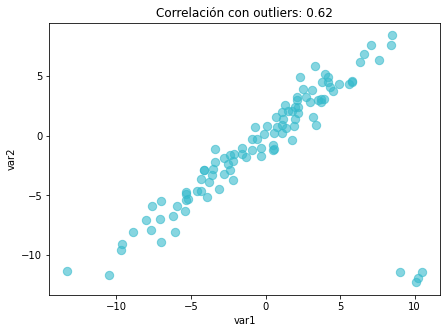

In [24]:
df.plot.scatter('var1', 'var2', title=f'Correlación con outliers: {r:.2}',
                     s = 70, alpha = 0.6, color = '#35bacc', figsize = (7,5));

Como se puede apreciar, existen valores atípicos en la equina inferior derecha. Primero, vamos a localizar los puntos problemáticos para volverlos a visualizar:

In [25]:
outliers = df[(df['var1'] >= 9.0) & (df['var2'] < -11)]
outliers

,var1,var2
100,9.0,-11.4
101,10.1,-12.3
102,10.5,-11.4
103,10.2,-11.9


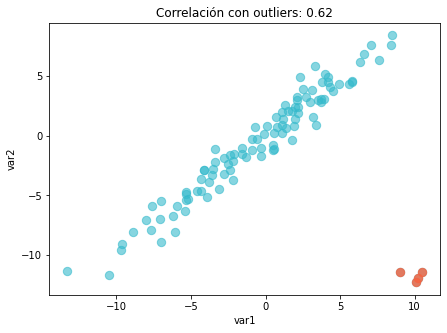

In [26]:
# Usamos ax para hacer las dos figuras en la misma gráfica
ax = df.plot.scatter('var1', 'var2', title= f'Correlación con outliers: {r:.2}',
                     s = 70, alpha = 0.6, color = '#35bacc', figsize = (7,5))
outliers.plot.scatter('var1', 'var2', s = 70, alpha = 0.8, color = '#f96340', ax = ax);

Si la naturaleza de los datos lo permite, vamos a limpiar estos datos atípicos de nuestro conjunto de datos para hacer el análisis de correlación nuevamente sin estos datos: 

In [27]:
# Construimos una máscara para filtrar los valores atípicos
mask = df.isin(outliers)
df_limpio = df.mask(mask).dropna() 

Nuevamente, calculamos el coeficiente de correlación entre las dos variables:

In [28]:
r = df_limpio['var1'].corr(df_limpio['var2']) # Método Pearson por defecto
print(r)

0.9742929117596348


Observe que el coeficiente se incrementó considerablemente ($r = 0.97$). Veamos el nuevo diagrama de dispersión entre las variables:

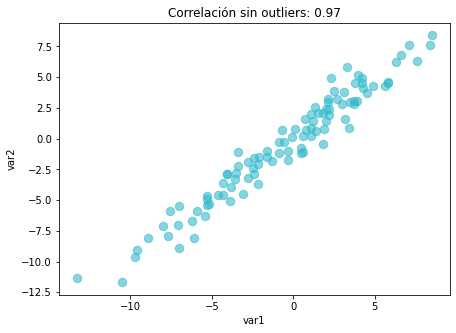

In [29]:
df_limpio.plot.scatter('var1', 'var2', title= f'Correlación sin outliers: {r:.2}',
                     s = 70, alpha = 0.6, color = '#35bacc', figsize = (7,5));

> **Nota:** De esta forma, podemos identificar una relación mucho más directa que la que habíamos podido identificar antes de limpiar el conjunto de datos. No obstante, tenga en cuenta que la posibilidad de limpiar los valores atípicos depende del entendimiento que tengamos de los datos. Debemos estar seguros de estar haciendo lo correcto al manipular los datos, en este caso, eliminando *outliers*. De lo contrario, podríamos estar manipulando los resultados de manera indeseada, sin reflejar la naturaleza real de la relación entre las variables.

## **1.3. Significancia estadística**
---

Como hemos visto, los coeficientes de correlación permiten cuantificar la relación entre variables. Al igual que con otras estimaciones, el cálculo de los coeficientes de correlación se apoya en la estadística inferencial para establecer los niveles de significancia de estas relaciones. Al realizar análisis de correlaciones es muy importante reportar los **p-valores** de las correlaciones para evitar señalar relaciones que puedan haberse producido por la aleatoriedad de los datos.

**Usando `SciPy`**
***

Si deseamos conocer el **p-valor** de una correlación usando *Python* debemos utilizar las siguientes funciones de la librería *SciPy*:

* [**`stats.pearsonr`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html): coeficiente de correlación $r$ de Pearson.
* [**`stats.spearmanr`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html): coeficiente de correlación $\rho$ de Spearman.
* [**`stats.kendalltau`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html): coeficiente de correlación $\tau$ de Kendall.

Estas funciones reciben como parámetros los arreglos **`x`** y **`y`**, y retornan:
* El coeficiente de correlación correspondiente.
* El **p-valor** para un test de hipótesis cuya hipótesis nula es que los datos no están correlacionados. Por lo tanto, si el **p-valor $\lt \alpha$** (nivel de significancia), esto quiere decir que la correlación es significativa. De lo contrario, la correlación puede deberse a la aleatoriedad de los datos, independientemente de su valor.

#### **1.3.1. Coeficiente de correlación de Pearson**
---

Suponga que queremos calcular el coeficiente de correlación y el **p-valor** de la relación para los datos del primer ejemplo de este notebook.

In [30]:
np.random.seed(1) # Para que siempre genere los mismos números aleatorios y/o reiniciar la seed.

var1 = pd.Series(range(10))
var2 = pd.Series(range(10,0,-1))
var3 = pd.Series(np.random.randint(0,10,10))
var4 = pd.Series(np.random.randint(0,10,10))

df = pd.DataFrame(data={'var1':var1, 'var2':var2, 
                        'var3':var3, 'var4':var4, })
df

,var1,var2,var3,var4
0,0,10,5,2
1,1,9,8,4
2,2,8,9,5
3,3,7,5,2
4,4,6,0,4
5,5,5,0,2
6,6,4,1,4
7,7,3,7,7
8,8,2,6,7
9,9,1,9,9


Vamos a declarar una función que calcula la correlación de Pearson y, además, interpreta el resultado del p-valor:

In [31]:
def correlacion_pearson_con_significancia(x, y, alfa=0.05):
  coef, p = stats.pearsonr(x, y)
  print(f'Coeficiente de correlación de Pearson: {coef:.2f}')
  if p > alfa:
    print(f'Las muestras no están correlacionadas (no rechazar H0) (p = {p:.2f})')
  else:
    print(f'Las muestras están correlacionadas (rechazar H0) (p = {p:.2f})')

In [32]:
correlacion_pearson_con_significancia(df['var1'], df['var2'])

Coeficiente de correlación de Pearson: -1.00
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


In [33]:
correlacion_pearson_con_significancia(df['var1'], df['var3'])

Coeficiente de correlación de Pearson: -0.00
Las muestras no están correlacionadas (no rechazar H0) (p = 1.00)


In [34]:
correlacion_pearson_con_significancia(df['var1'], df['var3'])

Coeficiente de correlación de Pearson: -0.00
Las muestras no están correlacionadas (no rechazar H0) (p = 1.00)


In [35]:
correlacion_pearson_con_significancia(df['var1'], df['var4'])

Coeficiente de correlación de Pearson: 0.75
Las muestras están correlacionadas (rechazar H0) (p = 0.01)


In [36]:
correlacion_pearson_con_significancia(df['var3'], df['var4'])


Coeficiente de correlación de Pearson: 0.56
Las muestras no están correlacionadas (no rechazar H0) (p = 0.09)


Observe que en este último caso, aunque el coeficiente de correlación era $r=0.56$, lo cual indica una relación moderada aparente entre `var3` y `var4` , el **p-valor** $= 0.091$ está por encima del nivel de significancia. Por lo tanto, podemos afirmar que la correlación NO es significativa, es decir, que no se rechaza la hipótesis nula. En otras palabras, esta correlación puede estar causada por la aleatoriedad de los datos, y no por una relación entre ambas variables.

#### **1.3.2. Coeficiente de correlación de Spearman**
---

Para este ejemplo, vamos a generar los siguientes datos artificiales:

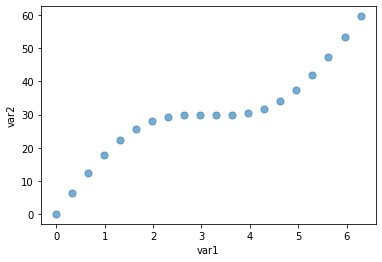

In [37]:
data1 = np.linspace(0, 2*np.pi, 20)
data2 = 10*np.sin(data1) + np.pi*np.arange(20)

df = pd.DataFrame(data={'var1':data1, 'var2':data2})

# Graficamos los datos
df.plot.scatter('var1', 'var2', s = 50, alpha = 0.6);

Si calculamos el coeficiente de correlación de Pearson:

In [38]:
correlacion_pearson_con_significancia(df['var1'], df['var2'])

Coeficiente de correlación de Pearson: 0.94
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


Obtenemos un coeficiente de correlación muy alto ($r = 0.94$) y un **p-valor** $=0$, indicando un alto nivel de significancia estadística. Sin embargo, estas variables no cumplen el supuesto de homocedasticidad, es decir, las muestras no tienen varianzas homogéneas. Esto se puede comprobar con la prueba de **`Levene`** que tiene como hipótesis nula que las muestras tienen varianza homogéneas, y es una prueba de una sola cola:


In [39]:
stat, pvalor = stats.levene(df['var1'], df['var2'])
if pvalor < 0.05:  
  print(f'Las muestras no tienen varianzas homogéneas (rechazar H0) p = {pvalor:.3f}')
else:
  print(f'Las muestras tienen varianza homogéneas (no rechazar H0) p = {pvalor:.3f}')

Las muestras no tienen varianzas homogéneas (rechazar H0) p = 0.001


En este caso, entonces, lo más adecuado será utilizar el coeficiente de correlación de **Spearman**. Esto también ocurre **cuando una de las muestras no está distribuida normalmente**. Además, este método es capaz de capturar de mejor manera la [relación monótona](https://es.wikipedia.org/wiki/Funci%C3%B3n_mon%C3%B3tona) entre las dos variables de este ejemplo, veamos:

In [40]:
def correlacion_spearmanr_con_significancia(a, b):
  coef, p = stats.spearmanr(a, b)
  print(f'Coeficiente de correlación de Spearman: {coef:.2f}')

  if p > 0.05:
    print(f'Las muestras no están correlacionadas (no rechazar H0) p = {p:.3f}')
  else:
    print(f'Las muestras están correlacionadas (rechazar H0) p = {p:.3f}')

In [41]:
correlacion_spearmanr_con_significancia(df['var1'], df['var2'])

Coeficiente de correlación de Spearman: 0.99
Las muestras están correlacionadas (rechazar H0) p = 0.000


Observe que en este caso la correlación no sólo es significativa, sino que el coeficiente $\rho$ de Spearman alcanzó un valor de $0.99$.

#### **1.3.3. Coeficiente de correlación de Kendall**
---

Por último, recordemos que el coeficiente de *Kendall* es un método no-paramétrico usado en variables categóricas ordinales. Se basa en la correspondencia entre el orden de cada pareja de observaciones. No realiza ninguna suposición sobre la distribución de los datos. La única suposición es que existe una relación monótona entre las variables probadas. Esta prueba es de dos colas, por lo que la significancia se debe dividir entre dos para compararlo contra el p-valor. Por lo tanto, podemos utilizar este método para establecer relaciones entre rankings.

> **Ejemplo:** Suponga que una empresa contrata a dos expertos para evaluar la calidad de un conjunto de piezas publicitarias que ha desarrollado y desea seleccionar las mejores. Para esto, a cada experto se le presenta cada una de las piezas publicitarias en el mismo orden y ellos deben seleccionar una única opción con respeto a qué tan de acuerdo o qué tan desacuerdo están con la siguiente afirmación:
>
> "*Esta pieza publicitaria es efectiva para conseguir el objetivo de la campaña.*"

Las opciones disponibles están dadas en una [escala Likert](https://es.wikipedia.org/wiki/Escala_Likert), de la siguiente manera: 

1. Totalmente en desacuerdo
2. En desacuerdo
3. Ni de acuerdo ni en desacuerdo
4. De acuerdo
5. Totalmente de acuerdo

Nótese que las respuestas de cada uno de los expertos pueden ser consideradas como **variables categóricas ordinales**. 

> **Pregunta**: Antes de elegir la mejor pieza publicitaria, la empresa está interesada en conocer: ¿en qué medida coincidió el criterio de ambos expertos en las puntuaciones seleccionadas? Al tratarse de valores ordinales, no existe un punto de comparación absoluto entre ambas variables, pero sí en el orden en que están organizadas. Por ejemplo, a lo que el experto 1 pudo haber contestado con la opción 4, quizás el experto 2 generalmente contestaba con la opción 5.

Supongamos que los resultados de la evaluación de los expertos son los siguientes:

In [42]:
items = pd.Series(range(1,11))

experto1 = pd.Series([5, 3, 4, 1, 1, 2, 3, 5, 1, 4])
experto2 = pd.Series([4, 3, 5, 2, 3, 4, 4, 5, 2, 4])

df = pd.DataFrame(data={'item':items, 'experto1':experto1, 'experto2':experto2})
df

,item,experto1,experto2
0,1,5,4
1,2,3,3
2,3,4,5
3,4,1,2
4,5,1,3
5,6,2,4
6,7,3,4
7,8,5,5
8,9,1,2
9,10,4,4


Calculamos el coeficiente de correlación $\tau$ de Kendall:

In [43]:
coef, p = stats.kendalltau(df['experto1'], df['experto2'])

print(f'Coeficiente de correlación de Kendall: {coef:.2f}')
if p > 0.05/2.0:
  print(f'Las muestras no están correlacionadas (no rechazar H0) p = {p:.3f}')
else:
  print(f'Las muestras están correlacionadas (rechazar H0) p = {p:.3f}')

Coeficiente de correlación de Kendall: 0.72
Las muestras están correlacionadas (rechazar H0) p = 0.009


Esto quiere decir que, con un $95\%$ de confianza (como se dijo anteriormente, es una prueba de dos colas), podemos afirmar que el criterio de evaluación de los expertos coincidió con un coeficiente de correlación moderado alto ($0.72$), y se puede proceder a seleccionar la campaña mejor punteada por los expertos. 

## **1.4. Correlaciones no lineales**
---
Un coeficiente de correlación bajo no implica que no exista relación entre las variables. Las variables pueden tener una relación no lineal que no sea detectada con los coeficientes de correlación típicos. Se recomienda que siempre verifique por medio de gráficos de dispersión o de líneas. 

Por ejemplo, si los datos tuvieran la siguiente relación:



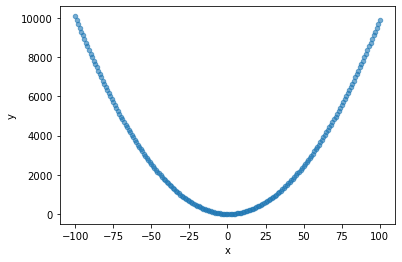

In [44]:
x = np.arange(-100,101)
y = x**2 - x  # Función cuadrática
df = pd.DataFrame(data={'x':x, 'y':y})

# Graficamos los datos
df.plot.scatter('x', 'y', s = 20, alpha = 0.6);

Si calculamos el coeficiente de correlación de Pearson:

In [45]:
correlacion_pearson_con_significancia(df['x'], df['y'])

Coeficiente de correlación de Pearson: -0.02
Las muestras no están correlacionadas (no rechazar H0) (p = 0.79)


Si calculamos el coeficiente de correlación de *Spearman*:

In [46]:
correlacion_spearmanr_con_significancia(df['x'], df['y'])

Coeficiente de correlación de Spearman: -0.01
Las muestras no están correlacionadas (no rechazar H0) p = 0.834


En ambos casos el resultado muestra un coeficiente de correlación cercano a $0.0$ y su p-valor indica que las muestras no están correlacionadas. Sin embargo, como se puede apreciar, aunque la relación entre las variables no es lineal, si hay una clara relación entre ellas dada por la ecuación: $y = x^2 - x$. 

Veamos otro ejemplo:

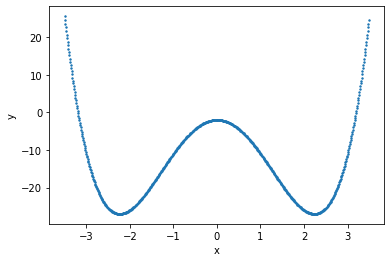

In [47]:
x = np.arange(-3.5, 3.5, 0.01)
y = x**4 - 10*x**2 - 2 # Función polinómica
df = pd.DataFrame(data={'x':x, 'y':y})

# Graficamos los datos
df.plot.scatter('x', 'y', s = 2);

Si calculamos el coeficiente de correlación de *Pearson*:

In [48]:
correlacion_pearson_con_significancia(df['x'], df['y'])

Coeficiente de correlación de Pearson: -0.01
Las muestras no están correlacionadas (no rechazar H0) (p = 0.83)


Si calculamos el coeficiente de correlación de Spearman:

In [49]:
correlacion_spearmanr_con_significancia(df['x'], df['y'])

Coeficiente de correlación de Spearman: -0.00
Las muestras no están correlacionadas (no rechazar H0) p = 0.901


En ambos casos el resultado es que el coeficiente de correlación es $0.0$ y su p-valor indica que las muestras no están correlacionadas. Sin embargo, como se puede apreciar, aunque la relación entre las variables no es lineal, si hay una clara relación entre ellas dada por la ecuación: $y = x^4 - 10x^2-2$. 

# **2. Análisis de regresión**
---
El análisis de regresión es el proceso estadístico en el que se busca modelar o definir relaciones y asociaciones específicas entre variables. A diferencia del análisis de correlación, con la regresión se definen funciones matemáticas que permiten predecir el valor de una variable dependiente a partir de una o varias variables independientes.  

En la regresión se define una variable dependiente de una o más variables distintas, entre las que pudo haber algún tipo de control en la medición. En muchos casos, el análisis de regresión lineal pasa por un análisis previo de correlación.

En este Notebook veremos cómo hacer regresiones de los siguientes tipos:

* Regresión lineal.
* Regresión multilineal.
* Regresión logística.



## **2.1. Datos**
---

Para los siguientes ejemplos trabajaremos con el dataset **`Framingham`**. Este conjunto de datos está disponible públicamente en el sitio web de [Kaggle](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression), y es de un estudio de riesgo cardiovascular sobre los residentes de la ciudad de Framingham, Massachusetts en Estados Unidos. El objetivo de la clasificación es predecir si el paciente tiene un riesgo de 10 años de padecer una futura enfermedad coronaria (CHD). El conjunto de datos proporciona la información de los pacientes con más de 3.000 registros y 15 atributos. Se incluyen diferentes variables con factores de riesgo potenciales a nivel demográficos, comportamentales y médicos.

**Demográficos:**
* **`male`**: Masculino o femenino (Nominal).
* **`age`**: Edad del paciente (aunque las edades registradas han sido truncadas a números enteros, el concepto de edad es continuo).

**Comportamiento:**
* **`currentSmoker`**: Si el paciente es o no fumador actualmente (nominal).
* **`cigsPerDay`**: El número de cigarrillos que la persona fuma en promedio en un día (puede considerarse continuo, ya que se puede tener cualquier número de cigarrillos, incluso medio cigarrillo).

**Historia médica:**
* **`BPMeds`**: Si el paciente estaba o no tomando medicamentos para la presión sanguínea (nominal).
* **`prevalentStroke`**: Si el paciente ha tenido previamente una apoplejía o no (nominal).
* **`prevalentHyp`**: Si el paciente era o no hipertenso (nominal).
* **`diabetes`**: Si el paciente tenía o no diabetes (nominal).
* **`totChol`**: Nivel de colesterol total (continuo).
* **`sysBP`**: Presión sanguínea sistólica (continua).
* **`diaBP`**: Presión arterial diastólica (continua).
* **`BMI`**: Índice de Masa Corporal - IMC (continuo).
* **`heartRate`**: Ritmo cardíaco (continuo).
* **`glucose`**: Nivel de glucosa (continuo).

**Variable objetivo deseada:**
* **`TenYearCHD`**: Riesgo de enfermedad coronaria CHD a 10 años (binario: "1", significa "Sí", "0" significa "No").

Primero, descargamos los datos y limpiamos el dataset:

In [5]:
url = "https://docs.google.com/uc?export=download&id=1z2k_-8DtwRGFZhRlSmJBwLn6d0JdLt_k"

df_cardio=pd.read_csv(url)
df_cardio.dropna(axis=0, inplace=True) # Se eliminan registros con valores faltantes
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [51]:
df_cardio.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## **2.2. Regresión lineal**
---

La regresión lineal es un modelo estadístico que examina la relación lineal entre dos variables. Este modelo plantea una relación lineal proporcional, en la que si una variable aumenta o disminuye, la otra también varía. El objetivo es entonces encontrar la función matemática que más se ajuste a los datos y minimice el error entre las observaciones iniciales y las predicciones. Uno de los métodos más utilizados en la regresión lineal es el método de mínimos cuadrados ordinarios. 

<img src = "https://drive.google.com/uc?export=view&id=1EPBzs6bGpO4AvRU8QQp_ym7aue4IfU5n" alt = "Regresión lineal" width = "65%">  </img>

En el siguiente ejemplo queremos modelar la relación existente entre la presión sistólica de los pacientes y su edad.

Exploremos la relación entre las variables de forma gráfica:

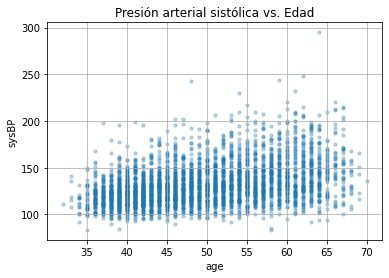

In [52]:
df_cardio.plot.scatter('age', 'sysBP', title="Presión arterial sistólica vs. Edad",
                s = 10, alpha = 0.3, grid=True); 

Antes de modelar la relación entre estas dos variables, inspeccionemos la correlación entre ellas:

In [53]:
correlacion_pearson_con_significancia(df_cardio['age'], df_cardio['sysBP'])

Coeficiente de correlación de Pearson: 0.39
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


Como se puede ver, existe una correlación leve entre ellas (coeficiente Pearson: $0.39$). Además esta relación es estadísticamente significativa (p-valor $=0$). 

**I. Usando `SciPy`**
***

La librería *SciPy* permite modelar la regresión lineal mediante la función  **`linregress`**:

* [**`scipy.stats.linregress`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

Esta función recibe las dos variables como parámetro (deben tener la misma longitud) y retorna 5 valores:
* Pendiente de la línea de regresión.
* Intercepción de la línea de regresión.
* Coeficiente de correlación.
* p-valor de dos colas para una prueba de hipótesis cuya hipótesis nula es que la pendiente es cero.
* Error estándar del gradiente estimado.

In [55]:
pend, interc, corr, p_valor, error_std = stats.linregress(df_cardio['age'], df_cardio['sysBP'])

print(f"pend = {pend:10f}")
print(f"interc = {interc:10f}")
print(f"corr = {corr:10f}")
print(f"p_valor = {p_valor:10f}")
print(f"error_std = {error_std:10f}")

pend =   1.002675
interc =  82.678032
corr =   0.388551
p_valor =   0.000000
error_std =   0.039336


Como se puede apreciar el p-valor es igual a $0$ aproximadamente, por lo que se puede decir que el modelo obtenido es estadísticamente significativo.

La **pendiente** y el **intercepto** de la regresión nos permiten construir la ecuación general de la recta que mejor describe la relación entre las dos variables:

$y = mx + b$

Donde: 

* $m$ = **pendiente**.
* $b$ = **intercepto**.

Por lo tanto, en nuestro caso:

$sysBP = pend * age + interc$

A continuación, vamos a añadir este modelo como una nueva columna (**`modeloPresionSis`**) al *DataFrame*:

In [56]:
df_cardio['modeloPresionSis'] =  pend * df_cardio['age'] + interc

Ahora vamos a visualizar nuevamente las variables, pero esta vez incluyendo la recta de la regresión lineal entre ellas:

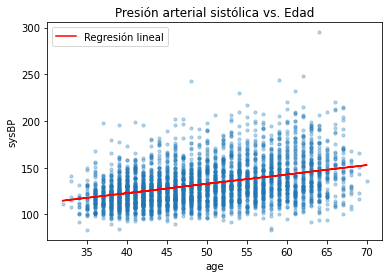

In [57]:
ax = df_cardio.plot.scatter('age', 'sysBP', title="Presión arterial sistólica vs. Edad",
                s = 10, alpha = 0.3, grid=True)
df_cardio.plot.line('age', 'modeloPresionSis', 
                   c='r', label='Regresión lineal', ax=ax);  

Por último, para interpretar este resultado calcularemos el [**coeficiente de determinación $R^2$**](https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n), que es igual al coeficiente de correlación elevado al cuadrado. El coeficiente de determinación determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo. El $R^2$ toma valores entre 0.0 y 1.0. Mientras mejor sea el modelo, el valor de $R^2$ será mayor.

In [58]:
print(f"R^2 = {corr**2}")

R^2 = 0.1509715678812276


En este caso vemos que el $R^2$ es bajo.

**II. Usando `statsmodels`**
***

La librería **`statsmodels`** no solo permite replicar el resultado anterior al modelar la relación entre dos variables, sino que permite construir modelos más generales donde se involucren más variables. A continuación usaremos las siguientes funciones:

* [**`statsmodels.regression.linear_model.OLS.from_formula`**](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.from_formula.html): Crea un modelo a partir de una fórmula y un *DataDrame*.
* [**`statsmodels.formula.api.ols`**](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html): Crea un modelo a partir de una fórmula y un *DataDrame* (otra forma).
* [**`statsmodels.regression.linear_model.OLS.fit`**](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.fit.html): Calcula los parámetros del modelo.
* [**`statsmodels.regression.linear_model.OLSResults.summary`**](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.summary.html): Presenta los resultados del modelo.
* [**`statsmodels.regression.linear_model.OLS.predict`**](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.predict.html): Calcula las predicciones del modelo.

A continuación vamos a recrear los resultados que habíamos obtenido con **`SciPy`** anteriormente:


In [59]:
# La fórmula se pone de la forma: VARIABLE_DEPENDIENTE ~ VARIABLE_INDEPENDIENTE 
model = sm.OLS.from_formula("sysBP ~ age", data=df_cardio)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sysBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     649.7
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          4.69e-132
Time:                        22:41:34   Log-Likelihood:                -16204.
No. Observations:                3656   AIC:                         3.241e+04
Df Residuals:                    3654   BIC:                         3.242e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.6780      1.978     41.793      0.000      78.799      86.557
age            1.0027      0.039     25.490      0.000       0.926       1.080
==============================================================================
Omnibus:                      601.047   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1296.811
Skew:                           0.962   Prob(JB):                    2.52e-282
Kurtosis:                       5.193   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De todos estos resultados los más interesantes son:
* **`R-squared`** (en la parte superior derecha): Coeficiente de determinación.
* **`Intercept`:** Intercepto de la recta.
* **`age`**: Pendiente de la recta.

Además, observe que por cada uno de los coeficientes se calcula su error estándar, estadístico **`t`**, **p-valor** (dos colas) y el intervalo de confianza del parámetro.

Podemos obtener el mismo resultado usando **`statsmodels.formula.api` (`smf`)**:

In [60]:
# La fórmula se pone de la forma: VARIABLE_DEPENDIENTE ~ VARIABLE_INDEPENDIENTE 
model = smf.ols("sysBP ~ age", data=df_cardio).fit() # Aquí creamos el modelo y calculamos sus parámetros directamente con fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sysBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     649.7
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          4.69e-132
Time:                        22:42:41   Log-Likelihood:                -16204.
No. Observations:                3656   AIC:                         3.241e+04
Df Residuals:                    3654   BIC:                         3.242e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.6780      1.978     41.793      0.000      78.799      86.557
age            1.0027      0.039     25.490      0.000       0.926       1.080
==============================================================================
Omnibus:                      601.047   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1296.811
Skew:                           0.962   Prob(JB):                    2.52e-282
Kurtosis:                       5.193   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **2.3. Regresión multilineal**
---

Hasta ahora hemos modelado la relación de una única variable independiente con una variable dependiente. Sin embargo, normalmente en las relaciones entre variables se involucran otros aspectos que hacen que dichas relaciones no sean tan directas. La **regresión lineal múltiple** es un modelo estadístico que examina la relación lineal entre más de dos variables, donde una es la variable dependiente o de respuesta, y las otras son variables independientes de predicción continuas o categóricas. La función del modelo de regresión lineal múltiple es muy similar a la función del modelo de regresión lineal de dos variables, con un coeficiente y una variable en la fórmula por cada variable predictora adicional. Así, el modelo general podría ser formulado de la siguiente manera:

$y = {\beta}_{0} +{\beta}_{1} x_1  + {\beta}_{2} x_2 + ... + {\beta}_{i} x_i + ... + u$

Por ejemplo, la presión arterial sistólica además de la edad, puede estar relacionada con otras variables tales como: el sexo, si es fumador o no, su índice de masa corporal (BMI), etc.

Veamos las correlacciones de las demás variables con respecto a la variable **`sysBP`** (presión sistólica):

In [62]:
# Obtenemos la matriz de correlacion, seleccionamos la variable de interés 'sysBP',
# Después, ordenamos los valores, y los presentamos en orden ascendente

df_cardio.corr()['sysBP'].sort_values()[::-1] 

sysBP               1.000000
diaBP               0.786727
prevalentHyp        0.697790
age                 0.388551
modeloPresionSis    0.388551
BMI                 0.331004
BPMeds              0.271291
TenYearCHD          0.222885
totChol             0.220130
heartRate           0.184901
glucose             0.134702
diabetes            0.102574
prevalentStroke     0.061080
male               -0.045484
cigsPerDay         -0.094764
education          -0.124511
currentSmoker      -0.134371
Name: sysBP, dtype: float64

Podemos ver que hay variables como **`diaBP`** (presión arterial diastólica), **`prevalentHyp`** (si el paciente era o no hipertenso), **`BMI`** (índice de masa corporal) que tienen una correlación no despreciable con nuestra variable de interés (**`sysBP`**). 

A continuación crearemos varios modelos, donde la variable dependiente es **`sysBP`** pero en este caso tendremos más de una variable independiente.

En primer lugar, veamos los resultados si las variables dependientes fueran **`age`** y **`prevalentHP`**: 

In [63]:
# La fórmula se pone de la forma: VARIABLE_DEPENDIENTE ~ VARIABLE_INDEPENDIENTE1 + VARIABLE_INDEPENDIENTE2 
model = sm.OLS.from_formula("sysBP ~ age + prevalentHyp", data=df_cardio)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sysBP   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1983.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:44:26   Log-Likelihood:                -15160.
No. Observations:                3656   AIC:                         3.033e+04
Df Residuals:                    3653   BIC:                         3.034e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       98.2381      1.515     64.824      0.000      95.267     101.209
age              0.4972      0.031     16.007      0.000       0.436       0.558
prevalentHyp    30.4638      0.574     53.063      0.000      29.338      31.589
==============================================================================
Omnibus:                      701.855   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2535.822
Skew:                           0.929   Prob(JB):                         0.00
Kurtosis:                       6.632   Cond. No.                         302.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observe que el $R^2$ se incrementó hasta $0.521$. Esto quiere decir que incluyendo el valor nominal que indica si el paciente era o no hipertenso el modelo mejoró notablemente. 

> **Nota:** La sintaxis de la fórmula **`sysBP ~ age + prevalentHyp`** en la celda anterior significa que estas dos variables se usarán para construir el modelo con sus dos respectivos coeficientes más un coeficiente de intercepto. Además, también nos dice que estas variables están incluidas en el modelo como predictores de la presión arterial sistólica.

Además, es muy importante considerar que el coeficiente de edad de $0,49$ sólo tiene sentido cuando se comparan dos personas que tengan el mismo **`prevalentHyp`**, y el coeficiente de **`prevalentHyp`** de $30.46$ sólo tiene sentido cuando se comparan dos personas de la misma edad.

Tenga en cuenta que en este caso, pese a ser nominal, dicha variable estaba previamente codificada con **`0`** y **`1`**. No obstante, si hubiese sido un valor categórico también hubiese sido posible crear el modelo. Por ejemplo, hagamos un ejemplo con la variable **`male`**, transformándola previamente de su codificación a valores categóricos: 



In [64]:
df_cardio.loc[df_cardio['male'] == 1, 'male'] = 'Hombre' 
df_cardio.loc[df_cardio['male'] == 0, 'male'] = 'Mujer'
df_cardio.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,modeloPresionSis
0,Hombre,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,121.782347
1,Mujer,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,128.801070
2,Hombre,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,130.806420
3,Mujer,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,143.841191
4,Mujer,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,128.801070


In [65]:
model = sm.OLS.from_formula("sysBP ~ age + prevalentHyp + male", data=df_cardio)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sysBP   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     1331.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:45:21   Log-Likelihood:                -15153.
No. Observations:                3656   AIC:                         3.031e+04
Df Residuals:                    3652   BIC:                         3.034e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        97.3539      1.533     63.521      0.000      94.349     100.359
male[T.Mujer]     1.8375      0.509      3.612      0.000       0.840       2.835
age               0.4943      0.031     15.934      0.000       0.433       0.555
prevalentHyp     30.4819      0.573     53.180      0.000      29.358      31.606
==============================================================================
Omnibus:                      686.740   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2413.873
Skew:                           0.917   Prob(JB):                         0.00
Kurtosis:                       6.533   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De esta forma, el modelo calcula coeficientes adicionales para dicha variable categórica, diferenciando cada uno de sus 2 posibles valores. 

Finalmente, creemos un modelo con un mayor número de variables independientes:

In [66]:
model = sm.OLS.from_formula("sysBP ~ age + prevalentHyp + male + diaBP + BMI", 
                            data=df_cardio)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sysBP   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1934.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:45:36   Log-Likelihood:                -14137.
No. Observations:                3656   AIC:                         2.829e+04
Df Residuals:                    3650   BIC:                         2.832e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.2316      2.117      7.194      0.000      11.081      19.383
male[T.Mujer]     3.1668      0.387      8.185      0.000       2.408       3.925
age               0.4600      0.024     19.547      0.000       0.414       0.506
prevalentHyp     13.7102      0.542     25.295      0.000      12.648      14.773
diaBP             1.0597      0.021     50.220      0.000       1.018       1.101
BMI               0.0172      0.051      0.336      0.737      -0.083       0.118
==============================================================================
Omnibus:                      636.524   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2022.243
Skew:                           0.882   Prob(JB):                         0.00
Kurtosis:                       6.188   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observe que se incrementó el $R^2$ aún más. También, la mayoría de las variables independientes aportan al resultado. Sin embargo, al examinar el coeficiente y el p-valor de la variable **`BMI`** podemos observar que no es significativo. Por lo tanto, crearemos un modelo final sin considerar dicha variable:

In [67]:
model = sm.OLS.from_formula("sysBP ~ age + prevalentHyp + male + diaBP", 
                            data=df_cardio)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sysBP   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     2419.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:45:53   Log-Likelihood:                -14137.
No. Observations:                3656   AIC:                         2.828e+04
Df Residuals:                    3651   BIC:                         2.831e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.5057      1.953      7.939      0.000      11.676      19.335
male[T.Mujer]     3.1587      0.386      8.181      0.000       2.402       3.916
age               0.4603      0.024     19.585      0.000       0.414       0.506
prevalentHyp     13.7246      0.540     25.404      0.000      12.665      14.784
diaBP             1.0616      0.020     52.109      0.000       1.022       1.102
==============================================================================
Omnibus:                      637.527   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2028.114
Skew:                           0.883   Prob(JB):                         0.00
Kurtosis:                       6.193   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Obtenemos el mismo coeficiente de determinación $R^2$ que antes ($0.726$).

## **2.4. Regresión logística**
---

La regresión logística es un modelo estadístico que examina la relación entre dos variables con un modelo matemático que simula un modelo logístico binario, empleado para modelar la probabilidad de ocurrencia de un evento en función de variables independientes.

<img src = "https://drive.google.com/uc?export=view&id=1e4PwC_aQJt-nuadUH2bvgob15Q9Vuq0X" alt = "Regresión logística" width = "65%">  </img>

La librería **`statsmodels`** permite construir modelos de este tipo mediante las siguientes funciones:

* [**`statsmodels.GLM.from_formula`**](https://www.statsmodels.org/devel/examples/notebooks/generated/glm_formula.html).
* [**`statsmodels.discrete.discrete_model.Logit`**](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.fit.html).

Por ejemplo, el objetivo de la clasificación de los datos con que hemos trabajado es predecir si el paciente tiene un riesgo de padecer una futura enfermedad coronaria (CHD) dentro de 10 años. Esta es la variable **`TenYearCHD`** del dataset.

**Regresión logística**

```
model = sm.GLM.from_formula( "V_DEP ~ V_IND1",
                  family=sm.families.Binomial(),
                    data=da)
```

**Regresión logística con 2 variables independientes**

```
model = sm.GLM.from_formula( "V_DEP ~ V_IND1 + V_IND2", 
                  family = sm.families.Binomial(), 
                    data = da)
```



In [6]:
df_cardio["TenYearCHD"]

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64

In [68]:
model = sm.GLM.from_formula("TenYearCHD ~ sysBP", family=sm.families.Binomial(), data=df_cardio)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                            GLM   Df Residuals:                     3654
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1478.6
Date:                Tue, 07 Sep 2021   Deviance:                       2957.3
Time:                        22:46:12   Pearson chi2:                 3.65e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0792      0.275    -18.443      0.000      -5.619      -4.539
sysBP          0.0246      0.002     12.729      0.000       0.021       0.028
==============================================================================
"""

In [69]:
model = sm.GLM.from_formula("TenYearCHD ~ sysBP + male + age", family=sm.families.Binomial(), data=df_cardio)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                            GLM   Df Residuals:                     3652
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1402.8
Date:                Tue, 07 Sep 2021   Deviance:                       2805.6
Time:                        22:46:41   Pearson chi2:                 3.67e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.1436      0.369    -19.373      0.000      -7.866      -6.421
male[T.Mujer]    -0.6890      0.099     -6.976      0.000      -0.883      -0.495
sysBP             0.0187      0.002      8.813      0.000       0.015       0.023
age               0.0625      0.006     10.190      0.000       0.051       0.075
=================================================================================
"""

Otra forma de hacerlo es con la función **`smf.logit`**:

In [70]:
model = smf.logit("TenYearCHD ~ sysBP + male + age", data=df_cardio)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.383698
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3652
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 Sep 2021   Pseudo R-squ.:                  0.1009
Time:                        22:46:52   Log-Likelihood:                -1402.8
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 5.843e-68
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.1436      0.369    -19.373      0.000      -7.866      -6.421
male[T.Mujer]    -0.6890      0.099     -6.976      0.000      -0.883      -0.495
sysBP             0.0187      0.002      8.813      0.000       0.015       0.023
age               0.0625      0.006     10.190      0.000       0.051       0.075
=================================================================================
"""

Finalmente podemos obtener los coeficientes del modelo con el atributo **`result.params`**.

In [71]:
result.params

Intercept       -7.143600
male[T.Mujer]   -0.688962
sysBP            0.018692
age              0.062549
dtype: float64

## **Recursos adicionales**
---
Para profundizar mucho más, le recomendamos los siguientes recursos adicionales:

*  [University of Michigan (Coursera) - Fitting Statistical Models to Data with Python](https://www.coursera.org/learn/fitting-statistical-models-data-python)
*  [Kaggle - Correlation (Pearson, Spearman and Kendall)](https://www.kaggle.com/kiyoung1027/correlation-pearson-spearman-and-kendall/report)
*  [towards data science - Simple and Multiple Linear Regression in Python](https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9)
*  [Data Vedas - Correlation Coefficients](https://www.datavedas.com/correlation-coefficients/)
*  [Mike Freeman - Binary Predictions Metrics](http://mfviz.com/binary-predictions/)
*  [Mike Freeman - An Introduction to Hierarchical Modeling](http://mfviz.com/hierarchical-models/)
*  [Joaquín Amat Rodrigo (Ciencia de datos) - Correlación lineal y Regresión lineal simple](https://www.cienciadedatos.net/documentos/24_correlacion_y_regresion_lineal)
*  [statsmodels documentation](https://www.statsmodels.org/stable/index.html)
*  [SciPy Statistical functions (scipy.stats)](https://docs.scipy.org/doc/scipy/reference/stats.html)

## **Créditos**
---

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
  - Alberto Nicolai Romero Martínez
  - Miguel Angel Ortiz Marín

* **Asistentes docentes (pequeñas correcciones):**
  - Joseph Alejandro Gallego Mejía

* **Fe de erratas:**
 * Punto 1.3.3 Coeficiente de correlación de Kendall: el coeficiente de correlación de Kendall es una prueba de dos colas, por lo que la significancia se debe dividir por 2 al compararlo con el p-valor
 * Punto 1.3.2 Prueba de Levene: esta prueba tiene como hipótesis nula que las varianzas son homogéneas, por lo tanto un p-valor > significancia nos dirá que no podemos rechazar la hipótesis nula.
 * Punto 2.2 Nota aclaratoria: el modelo de regresión lineal suma las variables linealmente multiplicadas cada una con un coeficiente y al final sumando un coeficiente de intercepto.

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*